In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
import copy

In [51]:
sns.set()

In [68]:
df_p=pd.read_csv('Placement_Data_Full_Class.csv')
df_p

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


# Data Cleaning

In [69]:
df_p.isnull().value_counts()

sl_no  gender  ssc_p  ssc_b  hsc_p  hsc_b  hsc_s  degree_p  degree_t  workex  etest_p  specialisation  mba_p  status  salary
False  False   False  False  False  False  False  False     False     False   False    False           False  False   False     148
                                                                                                                      True       67
dtype: int64

In [70]:
df_p.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [86]:
df_p.fillna(0.00,inplace=True)

In [87]:
df_p.head(50)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.00,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.00,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,0.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Placed,425000.0
5,6,M,55.00,Others,49.80,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed,0.0
6,7,F,46.00,Others,49.20,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed,0.0
7,8,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.00,Mkt&Fin,62.14,Placed,252000.0
8,9,M,73.00,Central,79.00,Central,Commerce,72.00,Comm&Mgmt,No,91.34,Mkt&Fin,61.29,Placed,231000.0
9,10,M,58.00,Central,70.00,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,Not Placed,0.0


In [88]:
df_p.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,198702.325581
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,154780.926716
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,0.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,0.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,240000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,282500.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [89]:
df_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          215 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [90]:
df_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          215 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


# Descriptive Statistics

In [91]:
#measures of central tendancy
df_p['status'].value_counts()

Placed        148
Not Placed     67
Name: status, dtype: int64

/Users/osho/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='status', ylabel='count'>

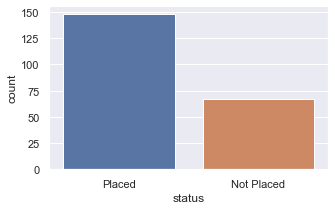

In [99]:
plt.figure(figsize=(5,3))
sns.countplot(df_p['status'])



In [92]:
#max and min
mx=df_p['degree_p'].max()
mn=df_p['degree_p'].min()
print("maximum marks scored by students",mx)
print("minimum marks scored by students",mn)

maximum marks scored by students 91.0
minimum marks scored by students 50.0


In [93]:
#Mean
df_p['salary'].mean()



198702.32558139536

In [94]:
#avg marks scored by students placed and non placed
degree=df_p.groupby(['status'])['degree_p'].mean()
degree

status
Not Placed    61.134179
Placed        68.740541
Name: degree_p, dtype: float64

In [95]:
# Standard Deviation

df_p['salary'].std()


154780.92671560106

# Quantiles

In [96]:
# the first quartile
df_p.quantile(0.25)

sl_no       54.500
ssc_p       60.600
hsc_p       60.900
degree_p    61.000
etest_p     60.000
mba_p       57.945
salary       0.000
Name: 0.25, dtype: float64

In [97]:
# the second quartile
df_p.quantile(0.5)

sl_no          108.0
ssc_p           67.0
hsc_p           65.0
degree_p        66.0
etest_p         71.0
mba_p           62.0
salary      240000.0
Name: 0.5, dtype: float64

In [98]:
# the third quartile
df_p.quantile(0.75)

sl_no          161.500
ssc_p           75.700
hsc_p           73.000
degree_p        72.000
etest_p         83.500
mba_p           66.255
salary      282500.000
Name: 0.75, dtype: float64

In [103]:
# filter the numeric variables from the data
df_num = df_p.select_dtypes(include = np.number)
# find the range
print(df_num.quantile(0.75)-df_num.quantile(0.25))

sl_no          107.00
ssc_p           15.10
hsc_p           12.10
degree_p        11.00
etest_p         23.50
mba_p            8.31
salary      282500.00
dtype: float64


# Variance

In [177]:
# Total Variance
df_p.var()

sl_no       3.870000e+03
ssc_p       1.172284e+02
hsc_p       1.187557e+02
degree_p    5.415110e+01
etest_p     1.762510e+02
mba_p       3.402838e+01
salary      2.395714e+10
dtype: float64

In [85]:
#measures of dispersion
# variability of percentage of marks for each department
v=df_p.groupby(['degree_t'])['degree_p'].var()
v

degree_t
Comm&Mgmt    53.359815
Others       56.086445
Sci&Tech     49.199035
Name: degree_p, dtype: float64

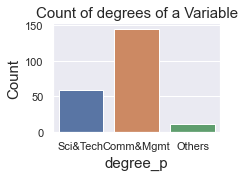

The category Comm&Mgmt has frequency 145


In [98]:
# count of students in each department
def degree_plot(variable):
    plt.figure(figsize=(3,2))
    sns.countplot(x = df_p['degree_t'])                                    
    plt.title('Count of degrees of a Variable', fontsize = 15)           
    plt.xlabel(variable, fontsize = 15)                                     
    plt.ylabel('Count', fontsize = 15)                                       
    plt.show()                                                               
    for deg, val in df_p['degree_t'].value_counts().iteritems():           
        print('The category', deg, 'has frequency', val)                     
        break                                                               
    

degree_plot('degree_p')

# Correlation and Covariance

In [101]:
#correlation between salary and mba_p

corr=df_p['mba_p'].corr(df_p['salary'])
print(corr)




0.13982273892615574


In [102]:
cov=df_p['mba_p'].cov(df_p['salary'])
print(cov)

126245.48554662032


# Skewness and Kurtosis

In [104]:
# use skew() to calculate the skewness
skew = df_p.skew()
# print the skewness
print(skew)

sl_no       0.000000
ssc_p      -0.132649
hsc_p       0.163639
degree_p    0.244917
etest_p     0.282308
mba_p       0.313576
salary      0.446646
dtype: float64


In [140]:
# use kurt() to calculate the kurtosis
df_p.kurt()

sl_no      -1.200000
ssc_p      -0.607510
hsc_p       0.450765
degree_p    0.052143
etest_p    -1.088580
mba_p      -0.470723
salary      1.655889
dtype: float64

# Normal Distribution

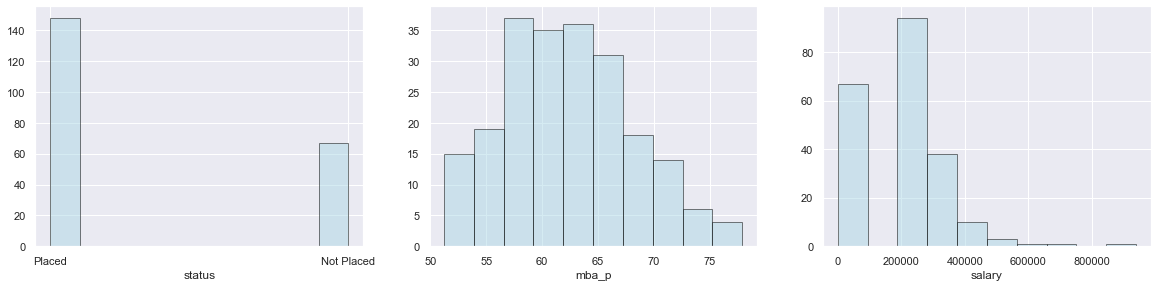

In [107]:
# comparision of status and mba_p and salary to determine distribution
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
plt.hist(df_p.status, color='lightblue', edgecolor = 'black', alpha = 0.5)
plt.xlabel('status')

plt.subplot(3,3,2)
plt.hist(df_p.mba_p, color='lightblue', edgecolor = 'black', alpha = 0.5)
plt.xlabel('mba_p')

plt.subplot(3,3,3)
plt.hist(df_p.salary, color='lightblue', edgecolor = 'black', alpha = 0.5)
plt.xlabel('salary')

plt.show()

In [49]:
df_p.status.value_counts()

Placed        148
Not Placed     67
Name: status, dtype: int64

# salary of students who got placed through campus


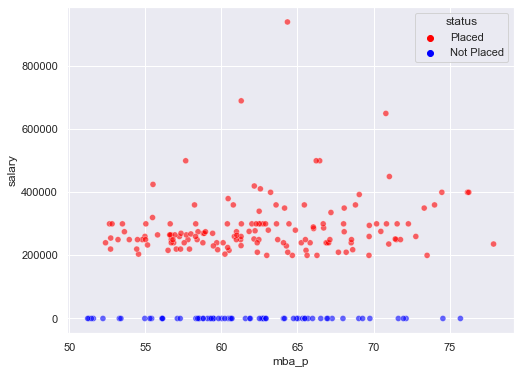

In [119]:

plt.figure(figsize=(8,6))
sns.scatterplot(x=df_p.mba_p, y=df_p.salary,hue=df_p.status,palette= ['red','blue'] ,alpha=0.6)
plt.show()

# T-Test

In [58]:
# T-test to check dependency of placed students with marks
Ho = "marks of the placed students are good than non placed students"   
Ha = "marks of the placed students are not good than non placed students"   
x = np.array(df_p[df_p.status == 'Placed'].mba_p)  
y = np.array(df_p[df_p.status == 'Not Placed'].mba_p) 

t, p_value  = stats.ttest_ind(x,y, axis = 0)  #Performing an Independent t-test

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value}) > 0.05')

marks of the placed students are good than non placed students as the p_value (0.26144500197748627) > 0.05


In [54]:
df1=df_p[df_p.status=='Placed']
df2=df_p[df_p.status=='Not Placed']

# Chi Square 

In [22]:
# Chi_square test to check if getting placed has an effect on genders

Ho = "Gender has no effect on getting placed"   
Ha = "Gender has an effect on getting placed"   

crosstab = pd.crosstab(df_p['gender'],df_p['status'])

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(2)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(2)}) > 0.05')
crosstab


Gender has no effect on getting placed as the p_value (0.24) > 0.05


status,Not Placed,Placed
gender,,
F,28,48
M,39,100


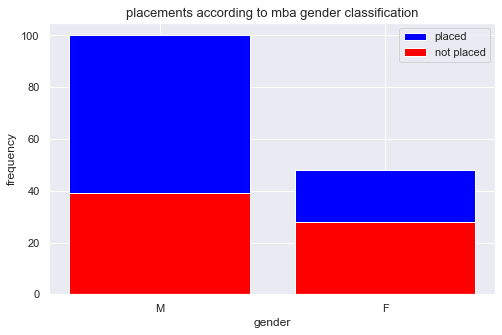

In [166]:
plt.figure(figsize=(8,5))
plt.bar(df1['gender'].unique(),height=df1['gender'].value_counts(),color='blue',label='placed')
plt.bar(df2['gender'].unique(),height=df2['gender'].value_counts(),color='red',label='not placed')

plt.xlabel('gender')
plt.ylabel('frequency')
plt.title('placements according to mba gender classification',fontsize=13)
plt.legend()

In [183]:
# Comparision of Specialisation and status using chi square method:

Ho="Relationship exist between specialisation and status"
Ha="Relationship does not exist between specialisation and status"
    
from scipy.stats import chi2_contingency
table = pd.crosstab(df_p['specialisation'], df_p['status'])
n=len(table)

observed_value = table.values
observed_value


test_stat, p_value, dof, expected_value = chi2_contingency(observed = observed_value, correction = False)


print("Test statistic:", test_stat)
print("p-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected values:", expected_value)



Test statistic: 13.508014470676486
p-value: 0.00023754674658192735
Degrees of freedom: 1
Expected values: [[37.39534884 82.60465116]
 [29.60465116 65.39534884]]


In [185]:
if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(4)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(4)}) > 0.05')
table

Relationship does not exist between specialisation and status as the p_value (0.0002) < 0.05


status,Not Placed,Placed
specialisation,,
Mkt&Fin,25,95
Mkt&HR,42,53


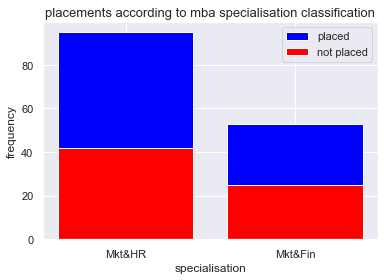

In [176]:
plt.figure(figsize=(6,4))
plt.bar(df1['specialisation'].unique(),height=df1['specialisation'].value_counts(),color='blue',label='placed')
plt.bar(df2['specialisation'].unique(),height=df2['specialisation'].value_counts(),color='red',label='not placed')

plt.xlabel('specialisation')
plt.ylabel('frequency')
plt.title('placements according to mba specialisation classification',fontsize=13)
plt.legend()

# Central Limit Theorem

In [152]:

D1 = df_p.degree_p
D2 = df_p.mba_p
D3 = df_p.salary


In [173]:
def central_limit_theorem(D,n_samples = 215, sample_size = 100):
    
    %matplotlib inline
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    min_value = 0  # minimum index of the data
    max_value = D.count()  # maximum index of the data
    b = {}
    for i in range(n_samples):
        x = np.unique(np.random.randint(min_value, max_value, size = sample_size)) # set of random numbers with a specific size
        b[i] = D[x].mean()   # mean of each sample
    S = pd.DataFrame()
    S['sample'] = b.keys()  # sample number 
    S['Mean'] = b.values()  # mean of that particular sample
    plt.figure(figsize= (15,5))

    plt.subplot(1,2,2)
    sns.distplot(S.Mean)
    plt.title(f"Sampling Distribution. \n  mean = {round(S.mean(), 3)} & SE = {round(S.std(),3)}")
    plt.xlabel('data')
    plt.ylabel('freq')

    plt.subplot(1,2,1)
    sns.distplot(D)
    plt.title(f"Population Distribution. \n mean = {round(D.mean(), 3)} & std = {round(D.std(),3)}")
    plt.xlabel('data')
    plt.ylabel('freq')

    plt.show()

/Users/osho/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


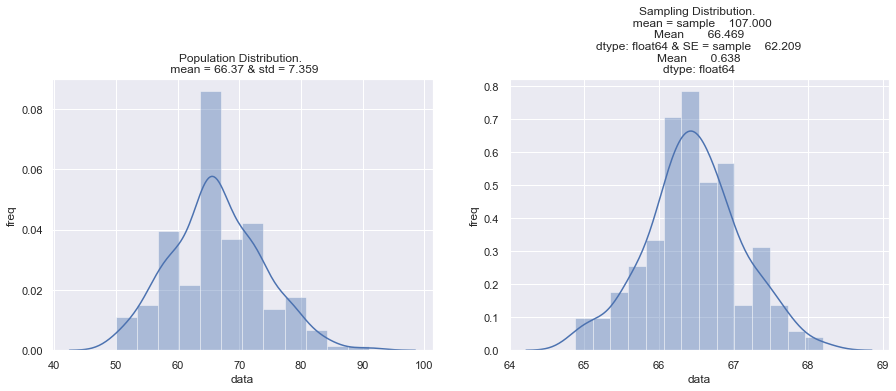

In [163]:
central_limit_theorem(D1,n_samples = 215, sample_size = 100)

/Users/osho/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/osho/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


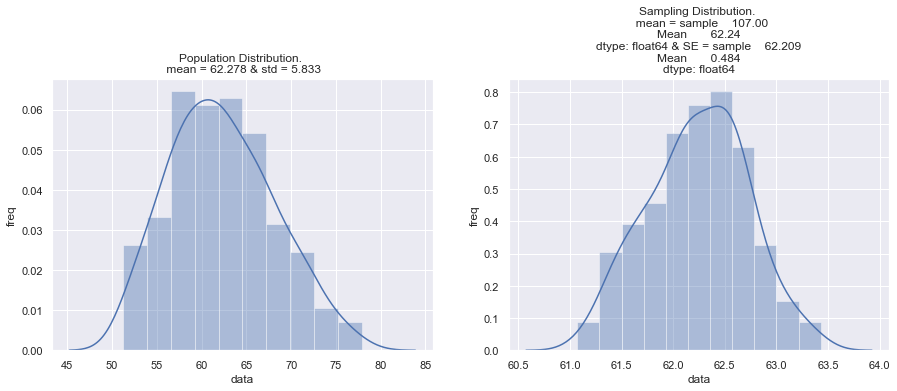

In [164]:
central_limit_theorem(D2,n_samples = 215, sample_size = 100)

/Users/osho/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/osho/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


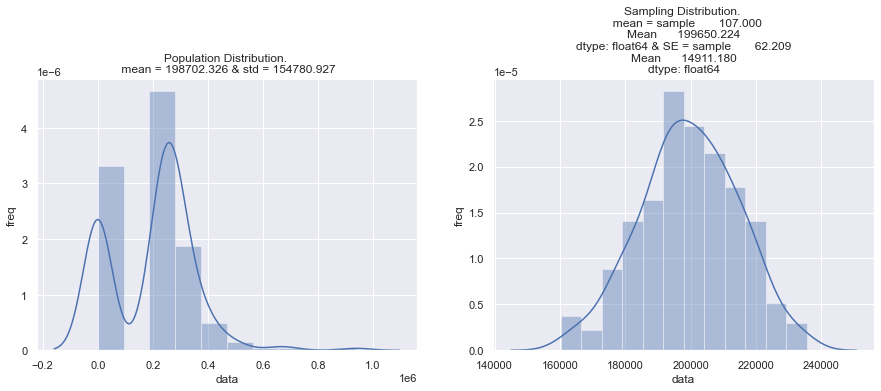

In [165]:
central_limit_theorem(D3,n_samples = 215, sample_size = 100)

# Conclusion